[0.7        0.69135802 0.68271605 0.67407407 0.6654321  0.65679012
 0.64814815 0.63950617 0.6308642  0.62222222 0.61358025 0.60493827
 0.5962963  0.58765432 0.57901235 0.57037037 0.5617284  0.55308642
 0.54444444 0.53580247 0.52716049 0.51851852 0.50987654 0.50123457
 0.49259259 0.48395062 0.47530864 0.46666667 0.45802469 0.44938272
 0.44074074 0.43209877 0.42345679 0.41481481 0.40617284 0.39753086
 0.38888889 0.38024691 0.37160494 0.36296296 0.35432099 0.34567901
 0.33703704 0.32839506 0.31975309 0.31111111 0.30246914 0.29382716
 0.28518519 0.27654321 0.26790123 0.25925926 0.25061728 0.24197531
 0.23333333 0.22469136 0.21604938 0.20740741 0.19876543 0.19012346
 0.18148148 0.17283951 0.16419753 0.15555556 0.14691358 0.1382716
 0.12962963 0.12098765 0.11234568 0.1037037  0.09506173 0.08641975
 0.07777778 0.0691358  0.06049383 0.05185185 0.04320988 0.0345679
 0.02592593 0.01728395 0.00864198 0.        ]
[0.         0.03125963 0.06251926 0.09377889 0.12503851 0.15629814
 0.18755777 0.2188

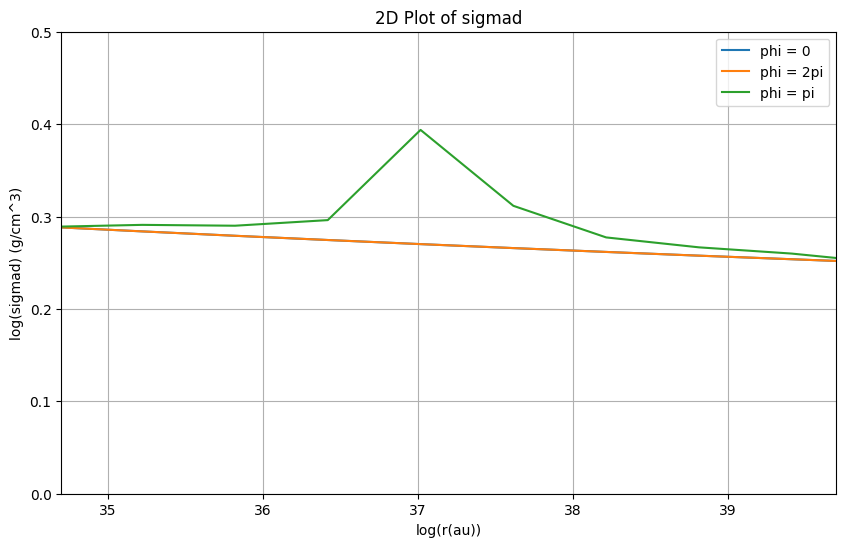

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


In [4]:
import New_Model as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
rrp,pp = np.meshgrid(d.grid.x,d.grid.z,indexing='ij')
 
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,100,0]
temp  = d.dusttemp[:,:,100,0]


In [5]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)
print('rhod.shape', rhod.shape)
print('temp.shape', temp.shape)
print(d.dusttemp.shape)
print(d.dusttemp[61,-1,0,0])
print(d.dusttemp[61,-1,100,0])
print(d.dusttemp[61,0,0,0])
print(d.dusttemp[61,0,100,0])

rhod.shape (150, 81)
temp.shape (150, 81)
(150, 81, 201, 2)
13.910949657921154
126.8894845085089
83.597667085024
72.85154064139807


In [6]:
print(d.grid.z)

[0.01562981 0.04688944 0.07814907 0.1094087  0.1406683  0.17192795
 0.2031876  0.2344472  0.26570685 0.2969665  0.3282261  0.3594857
 0.39074535 0.422005   0.4532646  0.48452425 0.5157839  0.5470435
 0.5783031  0.60956275 0.6408224  0.672082   0.70334165 0.7346013
 0.7658609  0.7971205  0.82838015 0.8596398  0.8908994  0.92215905
 0.9534187  0.98467825 1.015938   1.0471975  1.078457   1.109717
 1.1409765  1.172236   1.203496   1.2347555  1.266015   1.2972745
 1.328534   1.359794   1.3910535  1.422313   1.453573   1.4848325
 1.516092   1.5473515  1.578611   1.609871   1.6411305  1.67239
 1.70365    1.7349095  1.766169   1.7974285  1.828688   1.859948
 1.8912075  1.922467   1.953727   1.9849865  2.016246   2.0475055
 2.078765   2.110025   2.1412845  2.172544   2.203804   2.2350635
 2.266323   2.297583   2.3288425  2.360102   2.3913615  2.422621
 2.453881   2.4851405  2.5164     2.54766    2.5789195  2.610179
 2.6414385  2.672698   2.703958   2.7352175  2.766477   2.797737
 2.8289965  2.8

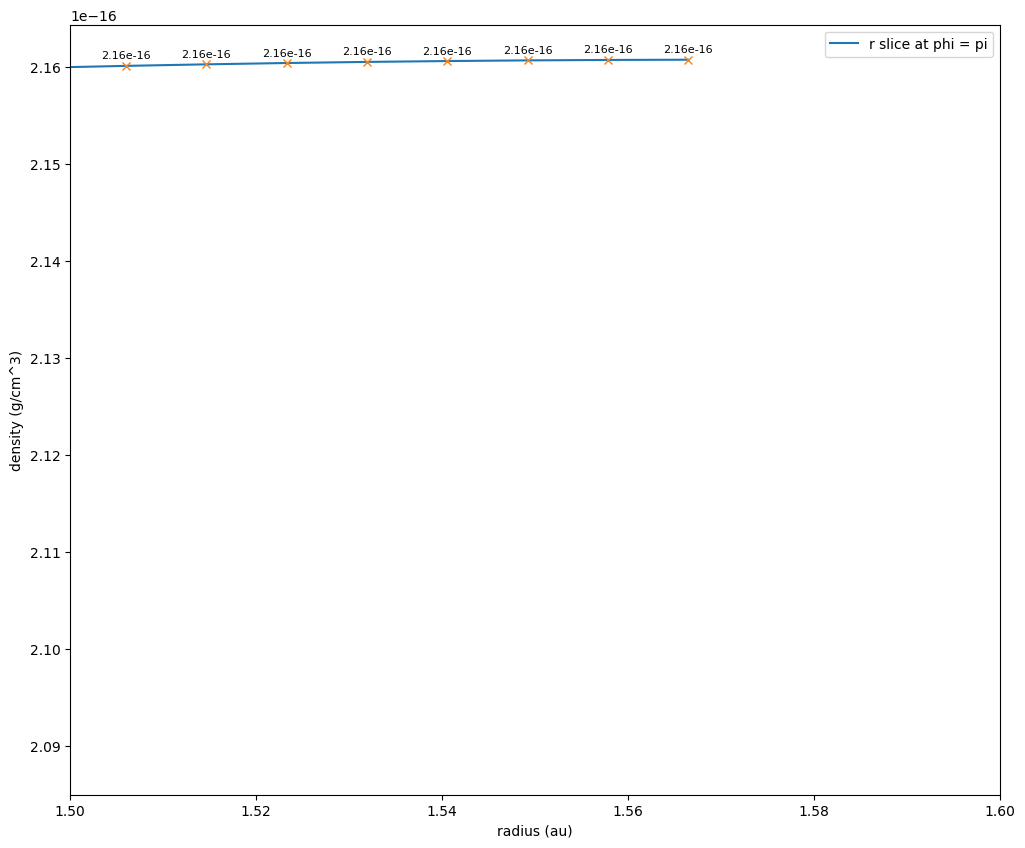

0.015071559590067824


In [7]:
plt.figure(figsize=(12,10))
plt.plot(d.grid.y, d.rhodust[61,:,100,0], '-' ,label ='r slice at phi = pi')
plt.plot(d.grid.y, d.rhodust[61,:,100,0], 'x')
for x, y in zip(d.grid.y , d.rhodust[61,:,100,0]):
    plt.annotate(f'{y:.2e}',  
                 (x, y),     
                 textcoords="offset points",  
                 xytext=(0, 5),  
                 ha='center', fontsize=8)  

plt.xlabel('radius (au)')
plt.xlim(1.5,1.6)
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()


print(np.mean(d.grid.y)/len(d.grid.y))


# plot density at different phi


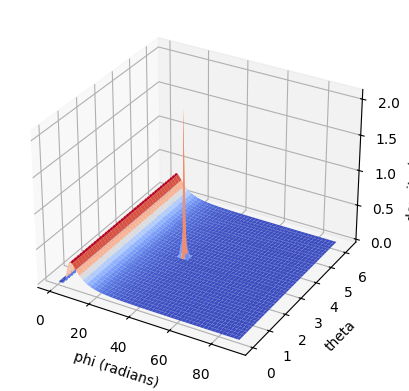

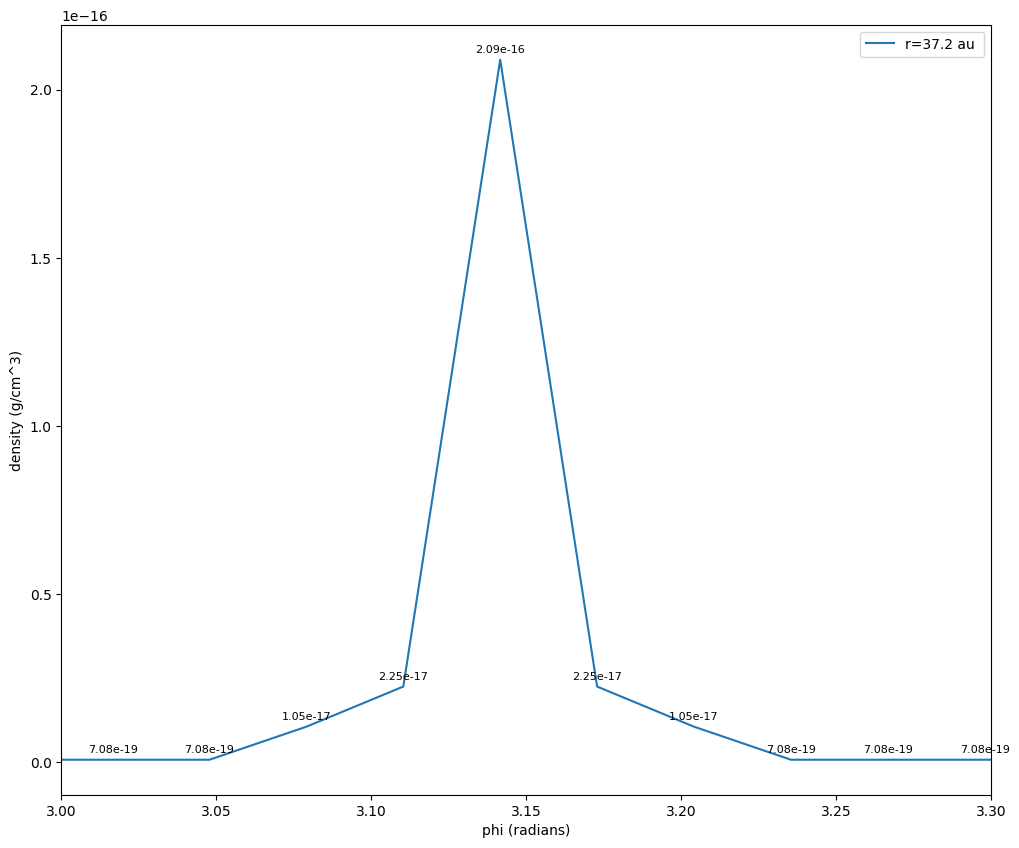

Its quite resonable that in that ring , the density is other phi-values is near zero. The two peaks might be because there are 2 pixels covering the disk?


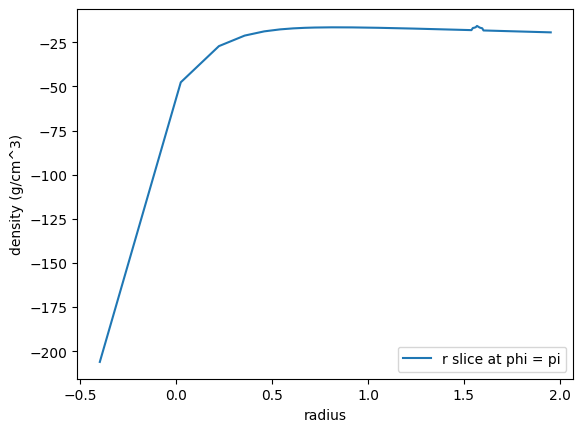

In [8]:
# plot density at different phi for a given r


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(rrp/au, pp, d.rhodust[:,0,:,0], cmap=cm.coolwarm)
ax.set_xlabel('phi (radians)')
#ax.set_xlim(55,65)
#ax.set_ylim(3.12,3.16)
ax.set_ylabel('theta')
ax.set_zlabel('density (g/cm^3)')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(d.grid.z, d.rhodust[61,0,:,0],label='r=37.2 au ')

for x, y in zip(d.grid.z, d.rhodust[61,0,:,0]):
    plt.annotate(f'{y:.2e}',  
                 (x, y),     
                 textcoords="offset points",  
                 xytext=(0, 5),  
                 ha='center', fontsize=8)  

plt.xlim(3, 3.3)
plt.xlabel('phi (radians)')
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()
print(f'Its quite resonable that in that ring , the density is other phi-values is near zero. The two peaks might be because there are 2 pixels covering the disk?')

plt.figure()
plt.plot(np.log10(d.grid.x/au), np.log10(d.rhodust[:,0,100,0]),label ='r slice at phi = pi')
plt.xlabel('radius')
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()




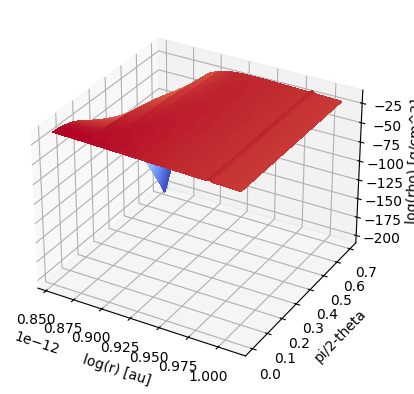

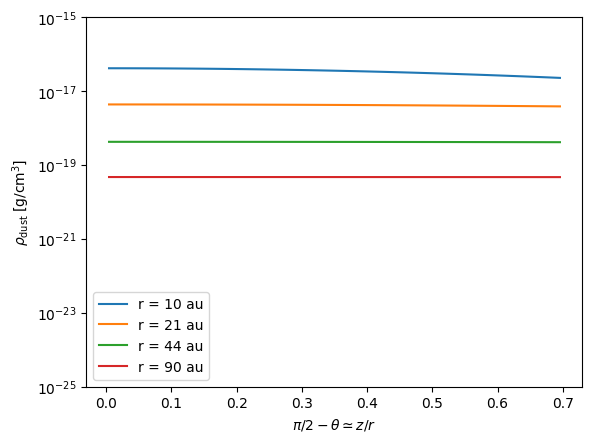

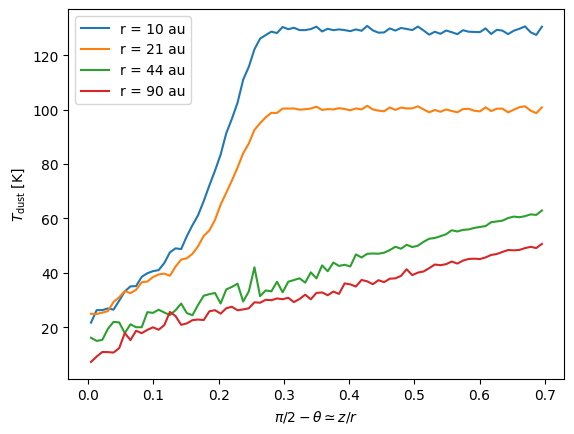

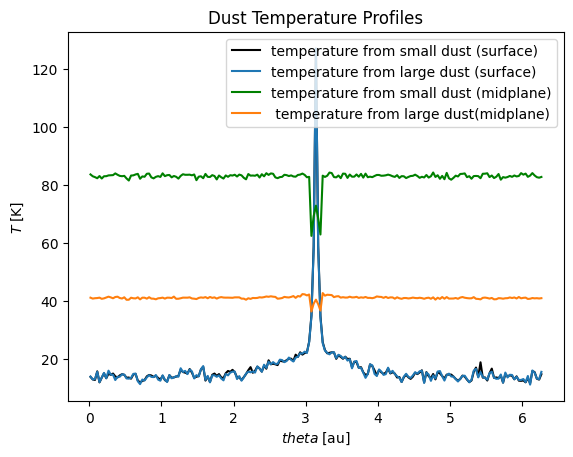

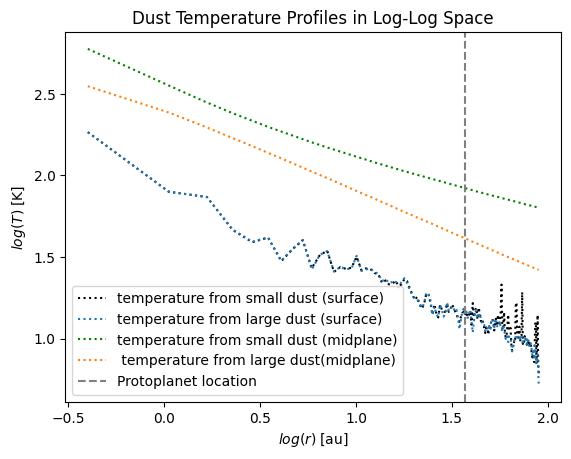

In [9]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)
ax.set_xlabel('log(r) [au]')
ax.set_ylabel('pi/2-theta')
ax.set_zlabel('log(rho) [g/cm^3]')
plt.show()

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.z, d.dusttemp[61, -1, :,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.z, d.dusttemp[61, -1, :,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.z, d.dusttemp[61, 0, :,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.z, d.dusttemp[61, 0, :,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
#plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$theta\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),':', label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),':', label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


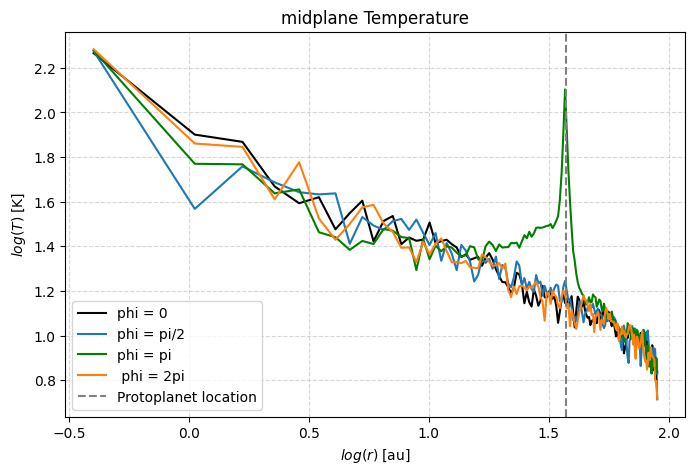

In [10]:
# An issue: super confused with which one is mid plane, which one is surface 
plt.figure( figsize=(8,5))

plt.title('midplane Temperature')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]),  label='phi = 0 ', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 50,1]), label='phi = pi/2', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100,1]), label='phi = pi', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, -1,1]), label=' phi = 2pi', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

In [11]:
print(np.min(d.dusttemp[:, -1, 0, 0]))

6.11687689413732


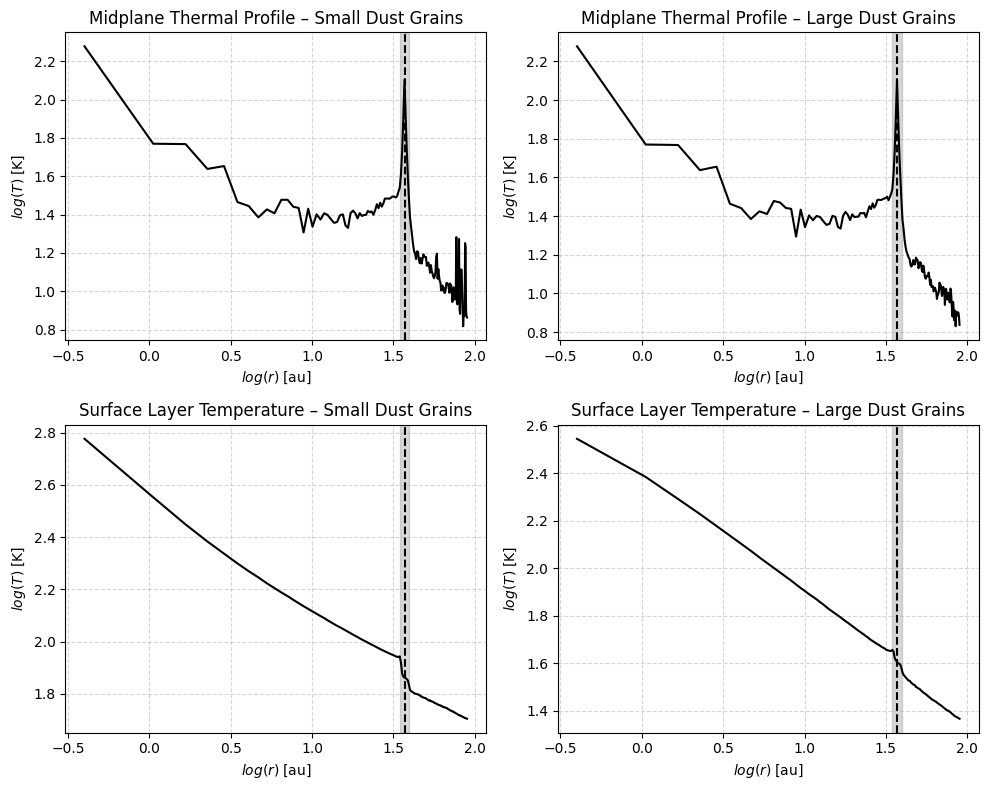

In [12]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#fig.suptitle('Dust Temperature for $\phi = \pi$', fontsize=16, y=1.02)
axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 0]), color='black')
axs[0, 0].set_title('Midplane Thermal Profile – Small Dust Grains')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[0, 0].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[0, 0].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[0, 0].grid(True, linestyle='--', alpha=0.5)


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 1]), color='black')
axs[0, 1].set_title('Midplane Thermal Profile – Large Dust Grains')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[0, 1].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[0, 1].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 0]), color='black')
axs[1, 0].set_title('Surface Layer Temperature – Small Dust Grains')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[1, 0].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[1, 0].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 1]), color='black')
axs[1, 1].set_title('Surface Layer Temperature – Large Dust Grains')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[1, 1].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[1, 1].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[1, 1].grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

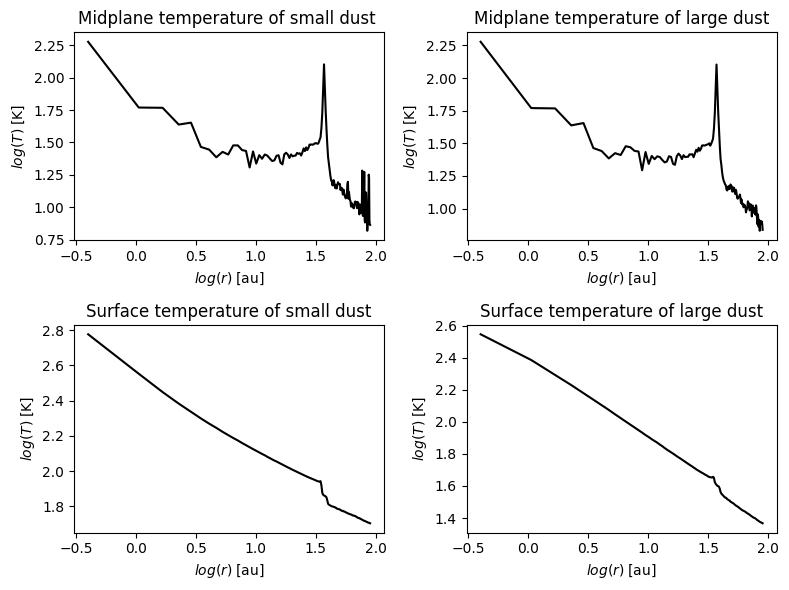

In [13]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 0]), color='black')
axs[0, 0].set_title('Midplane temperature of small dust ')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 1]), color='black')
axs[0, 1].set_title('Midplane temperature of large dust')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 0]), color='black')
axs[1, 0].set_title('Surface temperature of small dust')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 1]), color='black')
axs[1, 1].set_title('Surface temperature of large dust')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

[120.36877448 119.77368677 120.26105601 120.17844132 120.29742623
 120.32653799 119.35753912 120.04222552 119.16817307 118.7368981
 119.98199636 119.22361776 119.22776072 118.44732346 120.14455212
 120.16410355 118.97214234 119.14506138 119.53942688 119.33753954
 118.3156629  118.59809431 119.78792613 119.30931336 118.1203517
 120.55751055 120.14406198 119.29854926 120.48768093 119.51573359
 119.81198005 118.65658342 120.1595417  118.8591829  120.17012339
 119.28408804 119.72985498 119.30077324 119.56989421 120.8188403
 118.91938965 119.65508844 119.45287656 118.94567101 120.63088462
 118.68610506 119.39622443 118.49524616 118.5840382  117.89451564
 115.16248303 110.83354685 106.19820941 102.40418432  95.31009605
  89.94762858  82.85983337  75.70446258  71.50349506  65.62113576
  61.68216422  57.8272686   56.00379734  50.54469124  47.69581457
  45.43707393  44.15225543  41.59755484  42.00934246  41.14347528
  36.83690346  37.7842413   35.36417106  31.9216868   27.98895921
  24.97045549

The shape of x is (150, 201)
The shape of y is (150, 201)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_11692\152280388.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


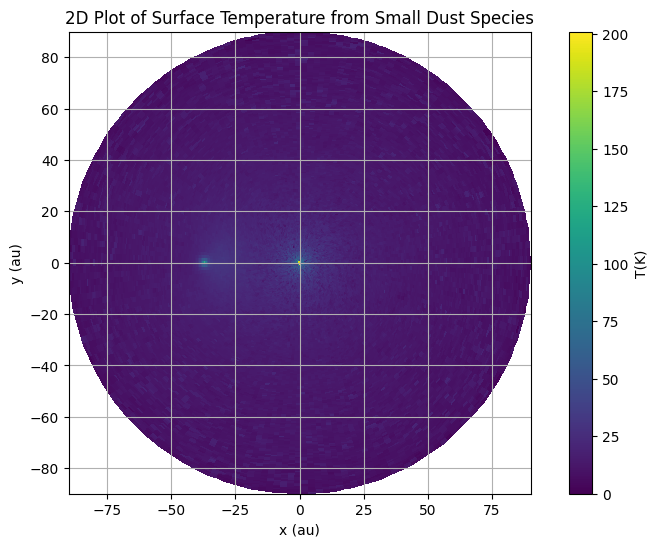

C:\Users\LHEM\AppData\Local\Temp\ipykernel_11692\152280388.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


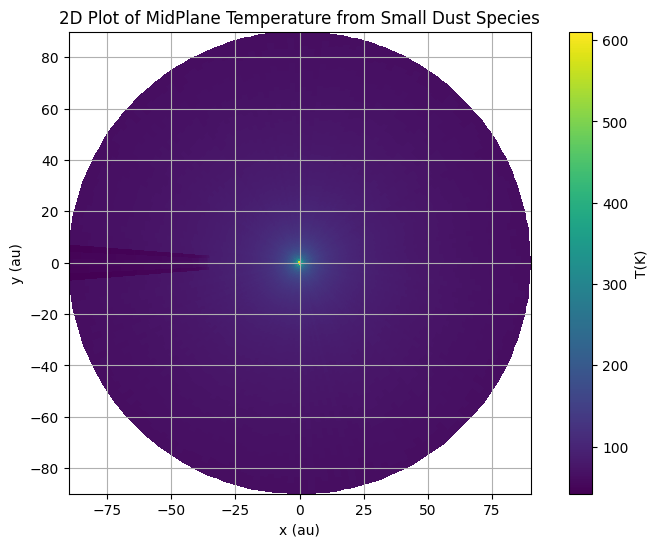

C:\Users\LHEM\AppData\Local\Temp\ipykernel_11692\152280388.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


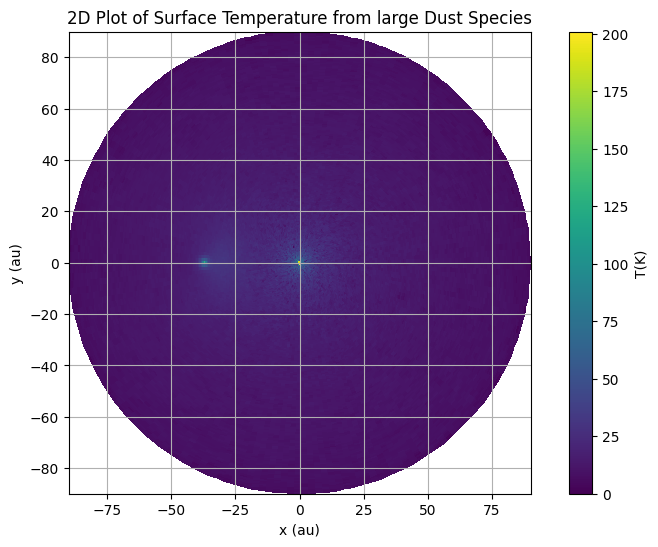

C:\Users\LHEM\AppData\Local\Temp\ipykernel_11692\152280388.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


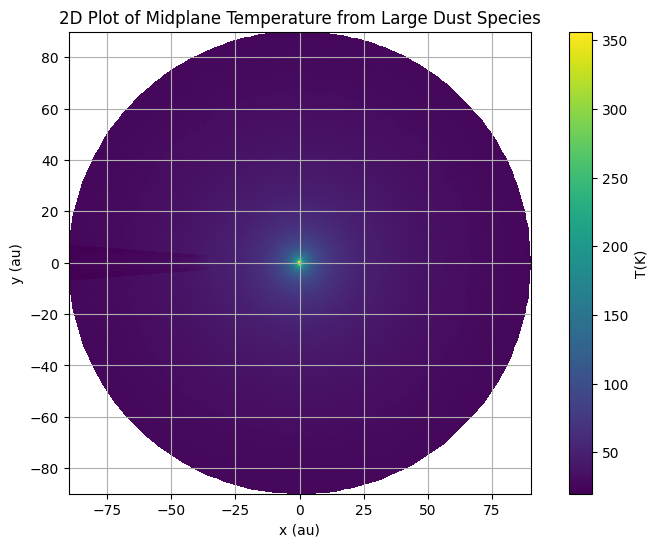

In [15]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

# Plot opacity

Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


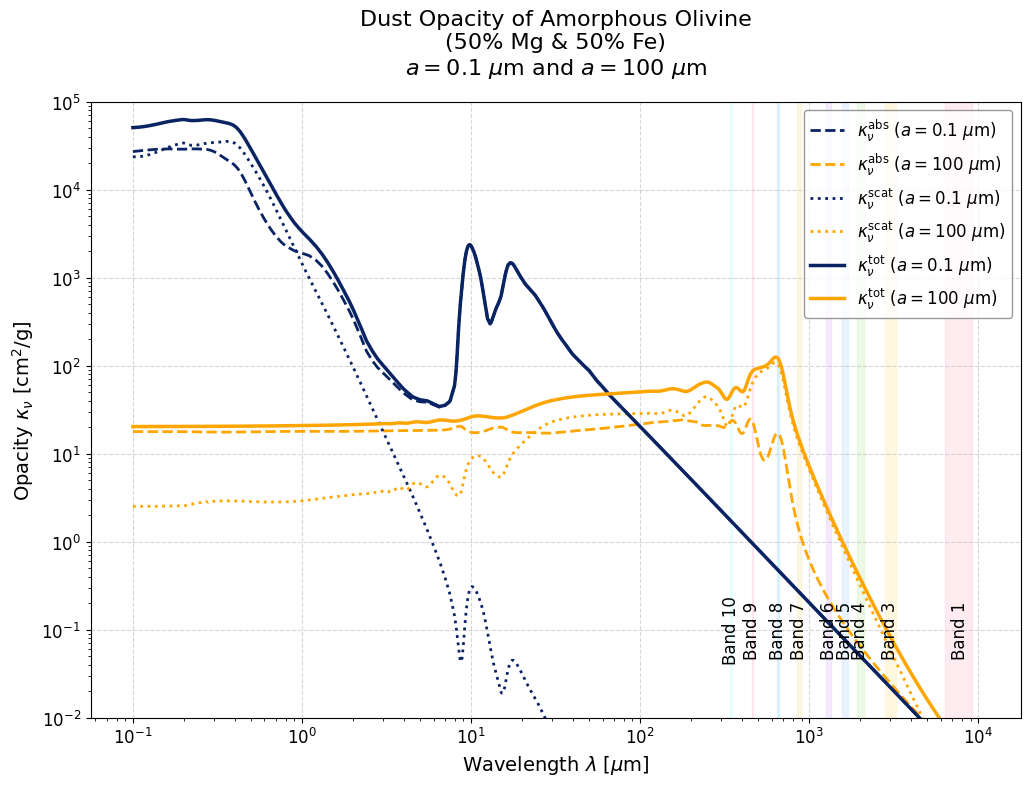

In [18]:

# Read opacity data
o1 = readOpac(ext='0.1_micron')
o2 = readOpac(ext='100_micron')

# Create figure with improved size
plt.figure(figsize=(12, 8))

# Plot absorption opacity
plt.loglog(o1.wav[0], o1.kabs[0], '--', label=r'$\kappa_\nu^{\mathrm{abs}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2)
plt.loglog(o2.wav[0], o2.kabs[0], '--', label=r'$\kappa_\nu^{\mathrm{abs}}$ ($a = 100\ \mu$m)', color='orange', linewidth=2)

# Plot scattering opacity
plt.loglog(o1.wav[0], o1.ksca[0], ':', label=r'$\kappa_\nu^{\mathrm{scat}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2)
plt.loglog(o2.wav[0], o2.ksca[0], ':', label=r'$\kappa_\nu^{\mathrm{scat}}$ ($a = 100\ \mu$m)', color='orange', linewidth=2)

# Plot total opacity
plt.loglog(o1.wav[0], o1.kabs[0] + o1.ksca[0], '-', label=r'$\kappa_\nu^{\mathrm{tot}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2.5)
plt.loglog(o2.wav[0], o2.kabs[0] + o2.ksca[0], '-', label=r'$\kappa_\nu^{\mathrm{tot}}$ ($a = 100\ \mu$m)', color='orange', linewidth=2.5)

# Set axis labels
plt.xlabel(r'Wavelength $\lambda$ [$\mu$m]', fontsize=14)
plt.ylabel(r'Opacity $\kappa_\nu$ [cm$^2$/g]', fontsize=14)

# Title with proper formatting
#plt.title(r'Dust Opacity (Amorphous Olivine (50% Mg & 50% Fe), $a = 0.1$ and $100\ \mu$m)', fontsize=15, pad=15)

plt.title(
    r'Dust Opacity of Amorphous Olivine' '\n'
    r'(50% Mg & 50% Fe)' '\n'
    r'$a = 0.1\ \mu$m and $a = 100\ \mu$m',
    fontsize=16,  # Slightly larger font size
    pad=20,       # Increase padding for better spacing
    loc='center'  # Center-align the title
)


# Set log scale limits
plt.ylim(1e-2, 1e5)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add notations of ALMA Band frequencies 
Wavelength_mum =  [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59]
Band= ['Band 1', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 9', 'Band 10']

# Add pastel rainbow colors (just a sample of nice colors)
colors = ['#ffd1dc', '#ffecb3', '#d0f0c0', '#cce5ff', '#e6ccff', '#fceabb', '#b3e6ff', '#ffcce0', '#ccffff']

# Plot shaded bands
for i, wl_center in enumerate(Wavelength_mum):
    # Convert wavelength (micron) to frequency (Hz)
    freq_center = 1e4 * cc / wl_center  # Convert microns to Hz

    # Apply ±7.5 GHz band width
    freq_min = freq_center - 7.5e9
    freq_max = freq_center + 7.5e9

    # Convert frequency back to wavelength in microns
    wl_min = 1e4 * cc / freq_max
    wl_max = 1e4 * cc / freq_min

    # Plot shaded region
    plt.axvspan(wl_min, wl_max, color=colors[i], alpha=0.4)

    # Annotate band name
    text_x = (wl_min + wl_max) / 2
    text_y = 1e-1
    plt.text(text_x, text_y, Band[i], fontsize=12, ha='center', va='center', rotation=90)

#Bandfrequencies = np.array('')

#for freq, name in zip(Bandfrequencies, Bandname):
##    ax2.annotate(name, xy=(freq, 1e-14), xytext=(freq + 5, 1e-14),
#                 rotation=90, verticalalignment='center', color='blue')
    



# Add legend with proper positioning
plt.legend(loc='best', fontsize=12, frameon=True, edgecolor='gray')


# Show the plot
plt.show()

In [ ]:
# Plot the optical depth
# adapted from plot_structure.py in the radmc3d github of run_ppdisk_fargo3d_1_axisymm


sig_d   = []  # store the dust surface densities
opacs   = []  # stores opacity for different dust species

# I have dustopac.inp and dustkappa.inp, don't have dustkapscatmat.inp
# I HAVE scattering opacity, but treated in just the Henyey-Greenstein non-polarized way, not the more realistic 

# I dont think I can do the polarization I need to change the dustkapp to dustscatkappa
with open('dustopac.inp','r') as f:   
    str=f.readline()
    str=f.readline()
    str=f.readline()
    for i in range(d.rhodust.shape[-1]):
        d.getSigmaDust(i)
        sig_d.append(d.sigmadust)   # reads the surface density of the dust species
        str=f.readline()
        str=f.readline()
        str=f.readline()
        ext=str.split()[0]
        o=readOpac(ext=ext,scatmat=False)  # I dont see this .ext entension
        opacs.append(o)
        str=f.readline()
        
values = [7500, 3000, 2000, 1621.62, 1304.35, 869.57, 652.17, 461.54, 344.83]

# Convert to a NumPy array
values_array = np.array(values)
taus    = []
for lam in values_array:
    kappas = []
    for o in opacs:
        kap = np.interp(lam,o.wav[0],o.kabs[0]+o.ksca[0]) # for each awvelength,interpolate the absorption and scattering opacity
        kappas.append(kap)
    tau = np.zeros((len(opacs),d.grid.nx,d.grid.nz))  # initialise the tau (optical depth array)
    for i,s in zip(np.arange(len(sig_d)),sig_d):
        tau[i,:,:] = s*kappas[i]   # tao is the product of surface density and opacity # stacked vertcial already
    taus.append(tau)


# Is kappa per mass of per volume?
# Write the formula for this 
# gcm^-2 (sigmad) * cm^2g^-1 (kappa)?



Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


In [ ]:
print(np.shape(d.rhodust))
print(d.rhodust.shape[-1])
print(np.shape(taus))
print(d.grid.nz)

(150, 81, 201, 2)
2
(9, 2, 150, 201)
201


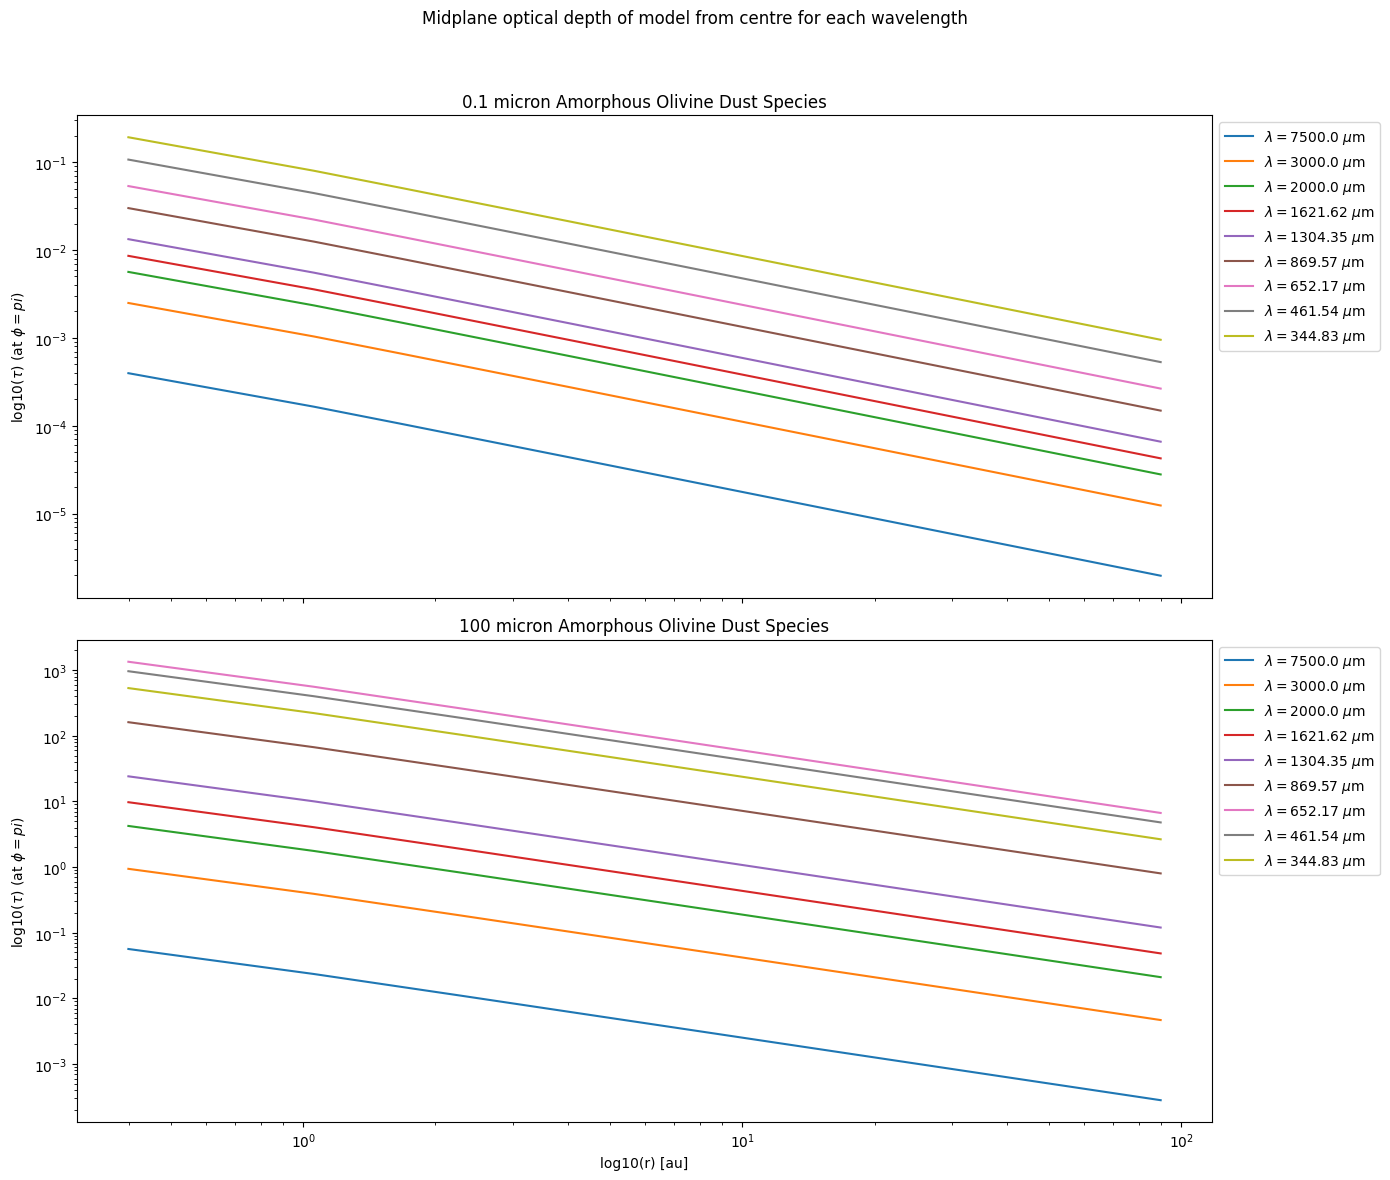

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Two subplots (1 row, 2 columns)

fig.suptitle('Midplane optical depth of model from centre for each wavelength')
sizelabel = ['0.1 micron','100 micron']
for i in range(len(opacs)):  # Iterate over species
    ax = axes[i]  
    for lam, tau in zip(values_array, taus):
        ax.loglog(d.grid.x / au, tau[i][:, 0],  # phi is 0
                  label=r'$\lambda={}$'.format(lam) + r' $\mu\mathrm{m}$')
    if i ==  1:
        ax.set_xlabel('log10(r) [au]')
    ax.set_ylabel(r'log10($\tau$) (at $\phi=pi$)')  # Only label y-axis for the first subplot
    ax.set_title(f'{sizelabel[i]} Amorphous Olivine Dust Species')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max

print(phi_max, phi_min)

0.02687524808475684 6.2563100590948295


In [ ]:

# plot the density

lgrin  = np.log10(a.grid.x[0]/au)
lgrout = np.log10(a.grid.x[-1]/au)
plt.figure()
plt.imshow(np.log10(a.rhodust[:,:,0,0].T),extent=[lgrin,lgrout,0,np.pi/2-a.grid.y[0]],aspect='auto',cmap=cm.Blues)
plt.xlabel(r'$^{10}\log(r)\; [\mathrm{AU}]$')
plt.ylabel(r'$\pi/2-\theta$')
cbar=plt.colorbar()
cbar.set_label(r'$^{10}\log(\rho)\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.show()

NameError: name 'a' is not defined

In [ ]:
import numpy as np

# Assuming you're using radmc3dPy
from radmc3dPy import analyze

# Load data

# Meshgrid of coordinates (already spherical: r, theta, phi)
rr, zz, pp = np.meshgrid(d.grid.x, d.grid.y, d.grid.z, indexing='ij')

# Define CPD region (AU converted to cm)
au = 1.496e13  # 1 AU in cm
r_min = 34.7 * au
r_max = 39.7 * au
phi_max = np.arctan(2.5 / 37.2)  # radians

# Create masks for CPD region
mask_r = (rr >= r_min) & (rr <= r_max)
mask_phi = (pp >= np.pi - phi_max) & (pp <= np.pi + phi_max)
mask = mask_r & mask_phi

print(f'Number of cells in the CPD region: {np.sum(mask)}')

# Extract temperature and density arrays
dsm = d.dusttemp[:, :, :, 0]     # Small grains
rhodsms = d.rhodust[:, :, :, 0]
dbg = d.dusttemp[:, :, :, 1]     # Large grains
rhodbgb = d.rhodust[:, :, :, 1]

# 1. Get edges and compute cell widths
r_edges = d.grid.xi  # (nr+1)
theta_edges = d.grid.yi  # (ntheta+1)
phi_edges = d.grid.zi  # (nphi+1)

dr = np.diff(r_edges)           # shape: (nr,)
dtheta = np.diff(theta_edges)   # shape: (ntheta,)
dphi = np.diff(phi_edges)       # shape: (nphi,)

# 2. Get cell centers
r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])
theta_centers = 0.5 * (theta_edges[:-1] + theta_edges[1:])
phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])

# 3. Create 3D grids
r3d, theta3d, phi3d = np.meshgrid(r_centers, theta_centers, phi_centers, indexing='ij')
dr3d, dtheta3d, dphi3d = np.meshgrid(dr, dtheta, dphi, indexing='ij')

# 4. Correct spherical volume
volumes = (r3d**2) * np.sin(theta3d) * dr3d * dtheta3d * dphi3d

# Compute mass per cell
mass_per_cell_small = rhodsms[:, :, :] * volumes
mass_per_cell_large = rhodbgb[:, :, :] * volumes

# Mask temperature and mass for CPD region
T_cpd_small = dsm[:, :, :][mask]
mass_cpd_small = mass_per_cell_small[mask]
T_cpd_large = dbg[:, :, :][mask]
mass_cpd_large = mass_per_cell_large[mask]

# Mass-weighted average temperatures
T_mass_weighted_small = np.sum(T_cpd_small * mass_cpd_small) / np.sum(mass_cpd_small)
T_mass_weighted_large = np.sum(T_cpd_large * mass_cpd_large) / np.sum(mass_cpd_large)

print(f"Mass-weighted average CPD temperature (small grains): {T_mass_weighted_small:.2f} K")
print(f"Mass-weighted average CPD temperature (large grains): {T_mass_weighted_large:.2f} K")

# Total mass-weighted temperature (all grains)
total_mass = np.sum(mass_cpd_small) + np.sum(mass_cpd_large)
T_mass_weighted_total = (np.sum(T_cpd_small * mass_cpd_small) + np.sum(T_cpd_large * mass_cpd_large)) / total_mass

print(f"Total mass-weighted average CPD temperature (all grains): {T_mass_weighted_total:.2f} K")

Number of cells in the CPD region: 3240
Mass-weighted average CPD temperature (small grains): 43.53 K
Mass-weighted average CPD temperature (large grains): 45.77 K
Total mass-weighted average CPD temperature (all grains): 45.75 K


In [ ]:
# Compute CPD masses for small and large grains
mass_cpd_small_total = np.sum(mass_cpd_small)
mass_cpd_large_total = np.sum(mass_cpd_large)
mass_cpd_total = mass_cpd_small_total + mass_cpd_large_total

# Print the CPD masses
print(f"CPD mass (small grains): {mass_cpd_small_total:.3e} g")
print(f"CPD mass (large grains): {mass_cpd_large_total:.3e} g")
print(f"Total CPD mass (all grains): {mass_cpd_total:.3e} g")


# Define Earth's mass in grams
earth_mass = 5.972e27  # Earth mass in grams

# Compute CPD masses in Earth masses
mass_cpd_small_total_earth = mass_cpd_small_total / earth_mass
mass_cpd_large_total_earth = mass_cpd_large_total / earth_mass
mass_cpd_total_earth = mass_cpd_total / earth_mass

# Print the CPD masses in Earth masses
print(f"CPD mass (small grains): {mass_cpd_small_total_earth:.3e} M_earth")
print(f"CPD mass (large grains): {mass_cpd_large_total_earth:.3e} M_earth")
print(f"Total CPD mass (all grains): {mass_cpd_total_earth:.3e} M_earth")

CPD mass (small grains): 2.391e+26 g
CPD mass (large grains): 2.449e+28 g
Total CPD mass (all grains): 2.473e+28 g
CPD mass (small grains): 4.004e-02 M_earth
CPD mass (large grains): 4.101e+00 M_earth
Total CPD mass (all grains): 4.141e+00 M_earth
